## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('/home/muhammed-shafeeh/AI_ML/ML_Medical_insurance_cost_prediction/data/kaggle_data/insurance.csv')

#### Show Top 5 Records

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Preparing X and Y variables

In [5]:
X = df.drop(columns=['charges'],axis=1)

In [6]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [7]:
print("Categories in 'sex' variable:     ",end=" " )
print(df['sex'].unique())

print("Categories in 'region' variable:  ",end=" ")
print(df['region'].unique())

print("smoker' variable:",end=" " )
print(df['smoker'].unique())


Categories in 'sex' variable:      ['female' 'male']
Categories in 'region' variable:   ['southwest' 'southeast' 'northwest' 'northeast']
smoker' variable: ['yes' 'no']


In [8]:
y = df['charges']

In [9]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [11]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['sex'] = le.fit_transform(X['sex'])
X['smoker'] = le.fit_transform(X['smoker'])
X['region'] = le.fit_transform(X['region'])
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [12]:
# count the encoded values
X['sex'].value_counts()

sex
1    676
0    662
Name: count, dtype: int64

In [13]:
# count the encoded values
X['region'].value_counts()

region
2    364
3    325
1    325
0    324
Name: count, dtype: int64

In [14]:
# count the encoded values
X['smoker'].value_counts()

smoker
0    1064
1     274
Name: count, dtype: int64

In [10]:
X.shape

(1338, 6)

In [15]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1070, 6), (268, 6))

#### Create an Evaluate Function to give all metrics after model Training

In [16]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [56]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 6105.7893
- Mean Absolute Error: 4208.7620
- R2 Score: 0.7417
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5799.5871
- Mean Absolute Error: 4186.5089
- R2 Score: 0.7833


Lasso
Model performance for Training set
- Root Mean Squared Error: 6105.7903
- Mean Absolute Error: 4209.1351
- R2 Score: 0.7417
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5799.9430
- Mean Absolute Error: 4187.2449
- R2 Score: 0.7833


Ridge
Model performance for Training set
- Root Mean Squared Error: 6106.0333
- Mean Absolute Error: 4218.4315
- R2 Score: 0.7417
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5803.0847
- Mean Absolute Error: 4198.1410
- R2 Score: 0.7831


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 9350.5901
- Mean Absolute Error: 6486.3185


### Results

In [57]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,Gradient Boosting,0.877973
8,CatBoosting Regressor,0.868946
5,Random Forest Regressor,0.860583
7,XGBRegressor,0.850168
9,AdaBoost Regressor,0.820382
0,Linear Regression,0.783346
1,Lasso,0.783320
2,Ridge,0.783085
4,Decision Tree,0.698248
3,K-Neighbors Regressor,0.146339


## Linear Regression

In [23]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 78.33


## CatBoost Regressor

In [19]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor(verbose=False)
cat_model = cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 86.89


## Random Forest

In [28]:

rf_model = RandomForestRegressor()
rf_model = rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 86.23


## Plot y_pred and y_test

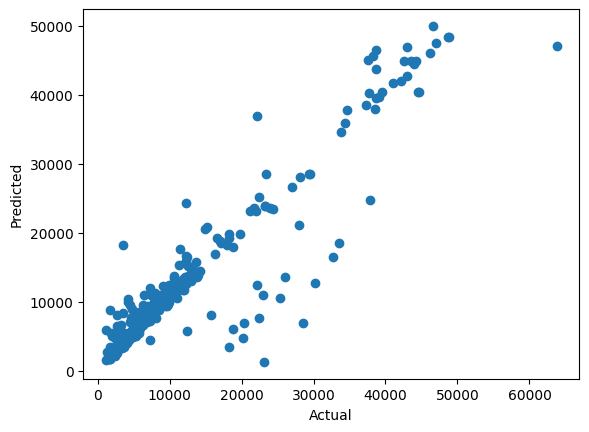

In [29]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

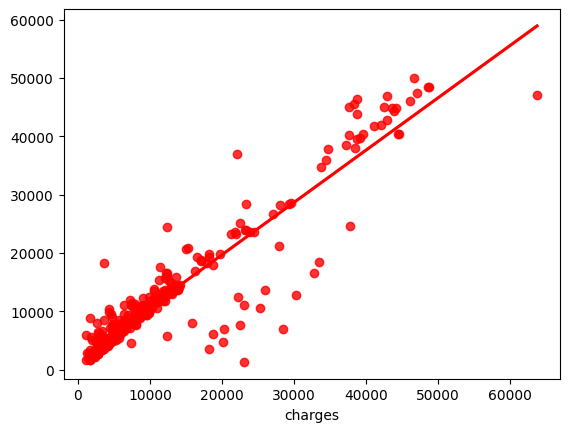

In [30]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [31]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
764,9095.06825,12302.245086,-3207.176836
887,5272.17580,5064.631867,207.543933
890,29330.98315,28470.678537,860.304613
1293,9301.89355,9708.096896,-406.203346
259,33750.29180,34681.011042,-930.719242
...,...,...,...
109,47055.53210,47457.999568,-402.467468
575,12222.89830,12573.632438,-350.734138
535,6067.12675,6567.336807,-500.210057
543,63770.42801,47032.313751,16738.114259


## Predictive System 

In [46]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Define the input data
input_data = (28, 'male', 33.000, 3, 'no', 'southeast')

# Define the categorical variables
categorical_variables = ['sex', 'smoker', 'region']

# Create a dictionary to map the categorical variables to numerical values
categorical_mapping = {
    'sex': {'male': 0, 'female': 1},
    'smoker': {'yes': 0, 'no': 1},
    'region': {'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}
}

# Create a LabelEncoder object for each categorical variable
label_encoders = {
    'sex': LabelEncoder(),
    'smoker': LabelEncoder(),
    'region': LabelEncoder()
}

# Fit the LabelEncoder objects to the categorical variables
label_encoders['sex'].fit(['male', 'female'])
label_encoders['smoker'].fit(['yes', 'no'])
label_encoders['region'].fit(['northeast', 'northwest', 'southeast', 'southwest'])

# Transform the input data using the LabelEncoder objects
encoded_input_data = [
    input_data[0],  # age
    label_encoders['sex'].transform([input_data[1]])[0],  # sex
    input_data[2],  # bmi
    input_data[3],  # children
    label_encoders['smoker'].transform([input_data[4]])[0],  # smoker
    label_encoders['region'].transform([input_data[5]])[0]  # region
]

print(encoded_input_data)

[28, 1, 33.0, 3, 0, 2]


In [50]:

encoded_input_data = np.array(encoded_input_data).reshape(1, -1)

pediction = rf_model.predict(encoded_input_data)
print("Predicted insurance cost: ",pediction)

Predicted insurance cost:  [4661.9896338]


/home/muhammed-shafeeh/AI_ML/ML_Medical_insurance_cost_prediction/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [51]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Define the categorical variables
categorical_variables = ['sex', 'smoker', 'region']

# Create a dictionary to map the categorical variables to numerical values
categorical_mapping = {
    'sex': {'male': 0, 'female': 1},
    'smoker': {'yes': 0, 'no': 1},
    'region': {'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}
}

# Create a LabelEncoder object for each categorical variable
label_encoders = {
    'sex': LabelEncoder(),
    'smoker': LabelEncoder(),
    'region': LabelEncoder()
}

# Fit the LabelEncoder objects to the categorical variables
label_encoders['sex'].fit(['male', 'female'])
label_encoders['smoker'].fit(['yes', 'no'])
label_encoders['region'].fit(['northeast', 'northwest', 'southeast', 'southwest'])

# Get the input data from the user
age = int(input("Enter your age: "))
sex = input("Enter your sex (male/female): ")
bmi = float(input("Enter your bmi: "))
children = int(input("Enter the number of children: "))
smoker = input("Are you a smoker? (yes/no): ")
region = input("Enter your region (northeast/northwest/southeast/southwest): ")

# Transform the input data using the LabelEncoder objects
encoded_input_data = [
    age,  # age
    label_encoders['sex'].transform([sex])[0],  # sex
    bmi,  # bmi
    children,  # children
    label_encoders['smoker'].transform([smoker])[0],  # smoker
    label_encoders['region'].transform([region])[0]  # region
]

print("Encoded input data: ", encoded_input_data)

Encoded input data:  [50, 1, 28.2, 3, 1, 0]


In [52]:

encoded_input_data = np.array(encoded_input_data).reshape(1, -1)

pediction = rf_model.predict(encoded_input_data)
print("Predicted insurance cost: ",pediction)

Predicted insurance cost:  [25297.2061432]


/home/muhammed-shafeeh/AI_ML/ML_Medical_insurance_cost_prediction/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the models
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'K-Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor()
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate each model
best_model = None
best_score = float('inf')
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = mean_squared_error(y_test, y_pred)
    print(f"{model_name}: {score}")
    if score < best_score:
        best_score = score
        best_model = model_name
print(f"Best model: {best_model}")
# Hyperparameter tuning for the best model
if best_model == 'Random Forest':
    param_grid = {
        'n_estimators': [10, 50, 100, 200],
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 5, 10]
    }
elif best_model == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [10, 50, 100, 200],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 5, 10]
    }
elif best_model == 'Linear Regression':
    param_grid = {
        'fit_intercept': [True, False]
    }
elif best_model == 'SVR':
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    }
elif best_model == 'K-Neighbors':
    param_grid = {
        'n_neighbors': [3, 5, 10],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }
elif best_model == 'Decision Tree':
    param_grid = {
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 5, 10]
    }

grid_search = GridSearchCV(models[best_model], param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", -grid_search.best_score_)

Random Forest: 20837148.216183137
Gradient Boosting: 18944595.15596614
Linear Regression: 33635210.431178406
SVR: 166474492.543819
K-Neighbors: 132529753.75201473
Decision Tree: 41516013.29829544
Best model: Gradient Boosting
Best parameters:  {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 50}
Best score:  22588817.74711247
